In [1]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten
from keras.datasets import mnist 

Using plaidml.keras.backend backend.


## Data Load and Preprocess

In [2]:
# load Data, x is for digit images, y is for digit labels
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

## Data Example

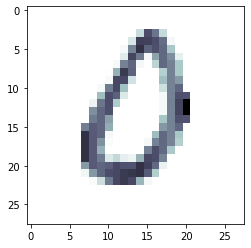

In [3]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
plt.imshow(x_train[666], cmap='bone_r')

<Figure size 432x288 with 0 Axes>

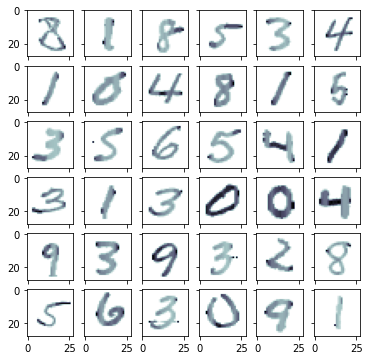

In [4]:
ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)
sample_images = x_train[random_indices, :]

plt.clf()

fig, axes = plt.subplots(
    ROWS,ROWS,
    figsize=(ROWS,ROWS),
    sharex=True,
    sharey=True
)

for i in range(ROWS*ROWS):
    subplot_row = i//ROWS
    subplot_col = i%ROWS
    ax = axes[subplot_row, subplot_col]
    
    plottable_image = np.reshape(sample_images[i,:], (28,28))
    ax.imshow(plottable_image,cmap='bone_r')

## Linear Model

In [5]:
img_pixels = 28*28
## Number of possible digits
output_size = 10
## Number of nodes in each layer
hidden_size = 128
batch_size = 128
epoch_num = 10

In [6]:
## Build Model Structure
model = Sequential()

## turns image 2D array to 1D
model.add(Flatten())

## Relu simulates an neuron activation. 
model.add(Dense(hidden_size, activation= keras.activations.relu))
model.add(Dense(hidden_size, activation= keras.activations.relu))
model.add(Dense(hidden_size, activation= keras.activations.relu))

## Function for choosing between probabilities
model.add(Dense(output_size, activation = keras.activations.softmax))

## stochastic gradient descent uses the loss function to find ways to change the weights
## to make better predictions

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

## model is created, but untrained, results should be about 1/10
result0 = model.evaluate(x_test, y_test)
print("Initial loss is {loss}, Initial accuracy is {acc}".format(loss = result0[0], acc = result0[1]))

INFO:plaidml:Opening device "opencl_amd_ellesmere.0"


10000/10000 [==============================] - 3s 278us/step
Initial loss is 2.2968213066101075, Initial accuracy is 0.1155


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(
    x_train, 
    y_train, 
    epochs= epoch_num, 
    batch_size= batch_size,
    initial_epoch=0
)
model.save("trained_mnist.model")

Epoch 1/10
60000/60000 [==============================] - 8s 141us/step - loss: 2.0860 - acc: 0.4407
Epoch 2/10
60000/60000 [==============================] - 4s 61us/step - loss: 1.0641 - acc: 0.7776
Epoch 3/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.5745 - acc: 0.8480
Epoch 4/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.4420 - acc: 0.8767
Epoch 5/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.3831 - acc: 0.8907
Epoch 6/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.3496 - acc: 0.8993
Epoch 7/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.3256 - acc: 0.9059
Epoch 8/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.3075 - acc: 0.9108
Epoch 9/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.2922 - acc: 0.9153
Epoch 10/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.2792 - acc: 0.919

In [9]:
model.save("trained_mnist.model")

## Training Visualization

[0.1155, 0.44066666673024496, 0.7776333333969117, 0.8479666667302449, 0.876716666730245, 0.8907000000635783, 0.8992666667302449, 0.905866666730245, 0.9108333333651225, 0.9153, 0.9189833333333334]


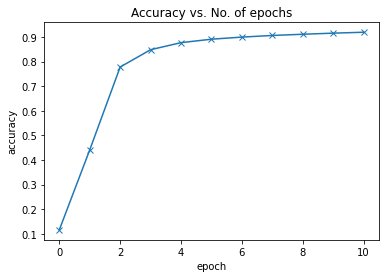

In [10]:
accuracies = history.history['acc']
accuracies.insert(0,result0[1])
print(accuracies)
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

## Testing Accuracy

In [11]:
val_los, val_acc = model.evaluate(x_test, y_test)
print(val_los, val_acc)

10000/10000 [==============================] - 1s 103us/step
0.2677010450839996 0.9225


3

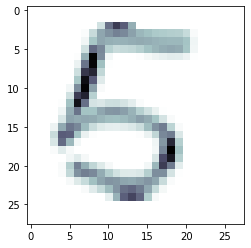

In [12]:
from PIL import Image
def test_image(img, model):
    pred = model.predict(img)
    ans = np.argmax(pred)
    return ans

img = Image.open('3test.png')
# greyscale conversion and other preprocessing
img = img.convert('L')
img = keras.preprocessing.image.img_to_array(img)
img = keras.utils.normalize(img, axis=1)
plt.imshow(img, cmap='bone_r')
img.resize(1,28,28)
test_image(img, model)

## Data Clean Up

In [13]:

x_test = x_test.reshape(-1,28,28,1)
x_train = x_train.reshape(-1,28,28,1)
## Better way to store labels as one hot
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Convolutional NN

In [21]:
from keras.layers import Conv2D, MaxPooling2D, Dropout
img_pixels = 28*28
output_size = 10
hidden_size = 64
batch_size = 128
epoch_num = 10

filters_1 = 64
filters_2 = 128

filter_size = 3

In [22]:
model_1 = Sequential()

## apply filter to each 3x3 pixel region, 64 times.
model_1.add(
    Conv2D(
        filters = filters_1, 
        kernel_size = filter_size,
        activation = 'relu', 
    )
)
## Max pooling find the largest number in the 2x2 square and shriks the images by only picking the largest number
model_1.add(MaxPooling2D((2,2)))

model_1.add(
    Conv2D(
        filters = filters_2, 
        kernel_size = filter_size,
        activation = 'relu'
    )
)
model_1.add(MaxPooling2D((2,2)))
## randomly turns off 25% of nodes, helps with overfitting
model_1.add(Dropout(.25))

## linear deep learning part
model_1.add(Flatten())
model_1.add(Dense(hidden_size, activation= keras.activations.relu))
model_1.add(Dense(hidden_size, activation= keras.activations.relu))
model_1.add(Dropout(.5))
model_1.add(Dense(10, activation = keras.activations.softmax))

## not sparse because i am using one hot

model_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
result0 = model_1.evaluate(x_test, y_test)
print("Initial loss is {loss}, Initial accuracy is {acc}".format(loss = result0[0], acc = result0[1]))

10000/10000 [==============================] - 5s 450us/step
Initial loss is 2.301942279052734, Initial accuracy is 0.1488


In [24]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                204864    
__________

In [25]:
history = model_1.fit(
    x_train, 
    y_train, 
    epochs= epoch_num, 
    batch_size= batch_size,
    initial_epoch=0
)

Epoch 1/10
60000/60000 [==============================] - 21s 344us/step - loss: 0.4238 - acc: 0.8679
Epoch 2/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.1334 - acc: 0.9634
Epoch 3/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.0950 - acc: 0.9742
Epoch 4/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0731 - acc: 0.9803
Epoch 5/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0628 - acc: 0.9828
Epoch 6/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.0514 - acc: 0.98650s - loss: 0.0513 - acc: 0.986
Epoch 7/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.0442 - acc: 0.9879
Epoch 8/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0375 - acc: 0.9892
Epoch 9/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0346 - acc: 0.9902
Epoch 10/10
60000/60000 [===========================

[0.1488, 0.8678500000317891, 0.9634000000317892, 0.9741500000317892, 0.9803, 0.9827833333969116, 0.9864833333969116, 0.98785, 0.9892000000317891, 0.9901666666666666, 0.991566666730245]


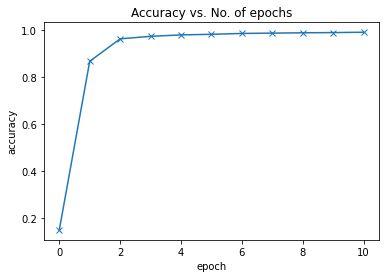

In [26]:
accuracies = history.history['acc']
accuracies.insert(0,result0[1])
print(accuracies)
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [27]:
val_los, val_acc = model_1.evaluate(x_test, y_test)
print(val_los, val_acc)

10000/10000 [==============================] - 1s 129us/step
0.032626701545715335 0.9906


In [53]:
img.resize(1,28,28,1)
test_image(img, model_1)

5

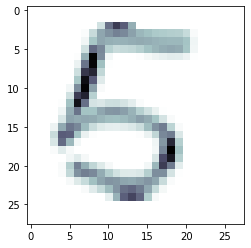

In [54]:
img.resize(28,28)
plt.imshow(img, cmap='bone_r')